In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("intel_new_table.csv")
df.head(5)

,Unnamed: 0,processor_number,brand,nGeneration,Quarter Launch,Year launch,Lithography,nbr_cores,nbr_P-cores,nbr_E-cores,...,max_resolution_hdmi,freq_hdmi(en Hz),max_resolution_dp,freq_dp(en Hz),max_resolution_edp,freq_edp,X-series,nGeneration2,series2,series
0,0,i9-13900KS,i9,13th,NaN,NaN,NaN,24,8.0,16.0,...,4096 x 2160,60.0,7680 x 4320,60.0,5120 x 3200,120.0,No,13.0,"['K', 'S']",KS
1,1,i9-13900F,i9,13th,NaN,NaN,NaN,24,8.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,13.0,['F'],F
2,2,i9-13900,i9,13th,NaN,NaN,NaN,24,8.0,16.0,...,4096 x 2160,60.0,7680 x 4320,60.0,5120 x 3200,120.0,No,13.0,[],O
3,3,i9-13900T,i9,13th,NaN,NaN,NaN,24,8.0,16.0,...,4096 x 2160,60.0,7680 x 4320,60.0,5120 x 3200,120.0,No,13.0,['T'],T
4,4,i7-13700F,i7,13th,NaN,NaN,NaN,16,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,13.0,['F'],F


In [5]:
df.columns

Index(['Unnamed: 0', 'processor_number', 'brand', 'nGeneration',
       'Quarter Launch', 'Year launch', 'Lithography', 'nbr_cores',
       'nbr_P-cores', 'nbr_E-cores', 'nbr_threads', 'max_turbo_frequency',
       'performance-core_base_freq', 'efficient-core_base_freq',
       'processor_base_freq', 'cache', 'processor_base_power',
       'max_memory_size', 'memory_types', 'max_PCI', 'supported_socket',
       'processor_graphics', 'graphics_max_dynamic_frequency',
       'optane_memory_supported', 'turbo_boost_max_technology2',
       'turbo_boost_max_technology3', 'vPro_platform_eligibity',
       'max_resolution_hdmi', 'freq_hdmi(en Hz)', 'max_resolution_dp',
       'freq_dp(en Hz)', 'max_resolution_edp', 'freq_edp', 'X-series',
       'nGeneration2', 'series2', 'series'],
      dtype='object')

In [8]:
df["nGeneration2"].unique()


array([13., 12., 11., 10.,  9.,  8., nan,  7.,  6.,  5.,  4.])

In [9]:

df["nGeneration"].unique()

array(['13th', '12th', '11th', '10th', '9th', 'X-series', '8th', '7th',
       '6th', '5th', '4th'], dtype=object)

In [6]:
filtered_df = df[(df["nGeneration"] == "11th") & (df["brand"] == "i9")]
print(filtered_df["processor_number"]) 

49     i9-11900T
50    i9-11900KF
51     i9-11900K
52     i9-11900F
53      i9-11900
Name: processor_number, dtype: object


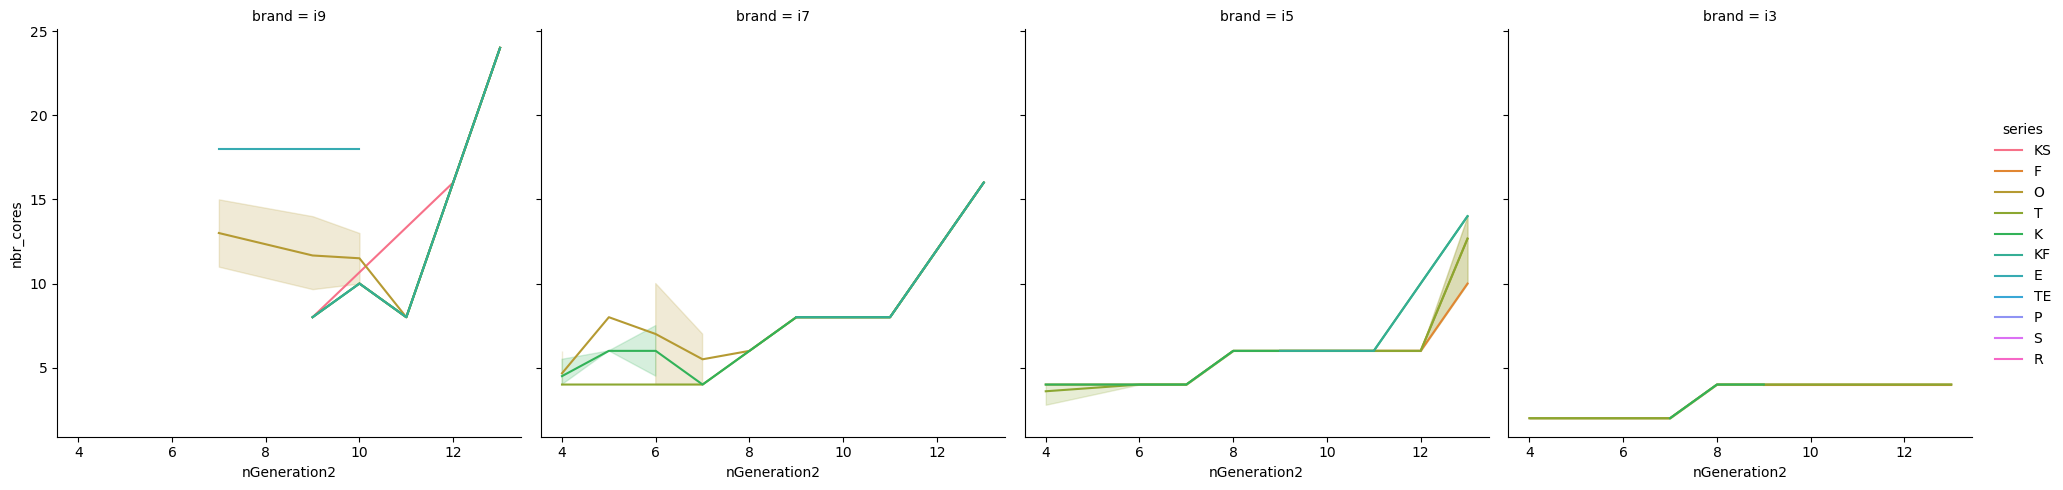

In [10]:
sns.relplot(
    data=df,
    kind='line',
    x="nGeneration2",  # Specify the primary x-axis variable
    y="nbr_cores", # Use hue for the additional x-axis variables
    hue="series",
    col="brand"
)

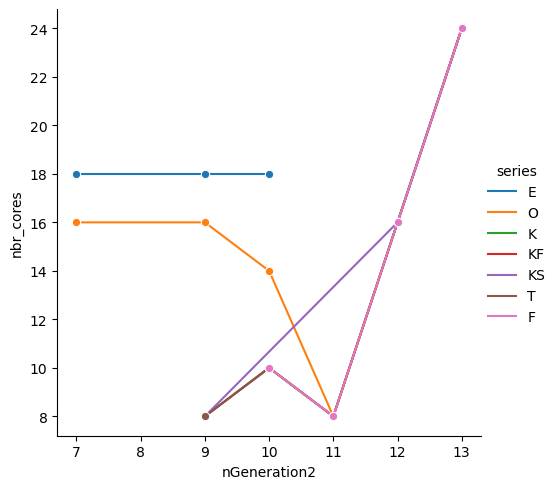

In [14]:

import pandas as pd

# Grouper le DataFrame par 'nGeneration2', 'series' et 'brand' et prendre le maximum de 'nbr_cores'
grouped_df = df.groupby(['nGeneration2', 'series', 'brand'])['nbr_cores'].max().reset_index()

grouped_df = grouped_df[grouped_df['brand'] == "i9"]

sns.relplot(
    data=grouped_df,
    kind='line',
    x="nGeneration2",  # Specify the primary x-axis variable
    y="nbr_cores", # Use hue for the additional x-axis variables
    hue="series",
    marker='o'
)

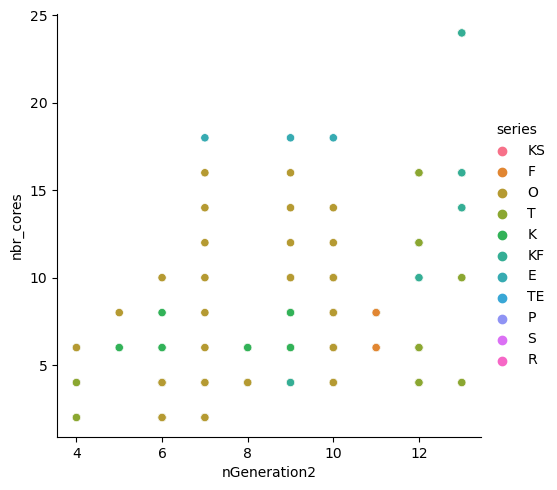

In [20]:
sns.relplot(
    data=df,
    x="nGeneration2",  # Specify the primary x-axis variable
    y="nbr_cores", # Use hue for the additional x-axis variables
    hue="series",
    marker='o'
) 

<AxesSubplot: xlabel='nGeneration2', ylabel='nbr_cores'>

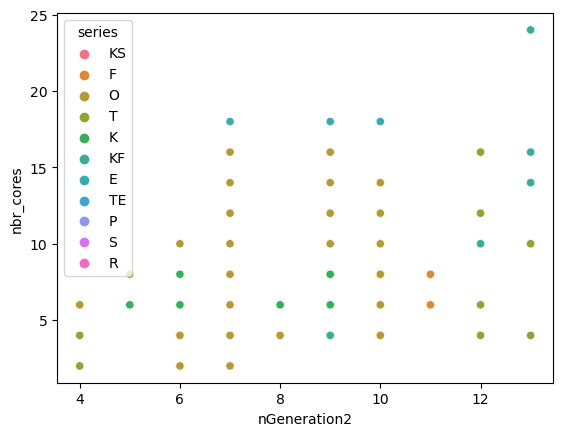

In [18]:
sns.scatterplot(
    data=df,
    x="nGeneration2",  # Specify the primary x-axis variable
    y="nbr_cores", # Use hue for the additional x-axis variables
    hue="series",
    marker='o'
)

(array([43.,  0.,  0., 62.,  0.,  0., 96.,  0.,  0., 64.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

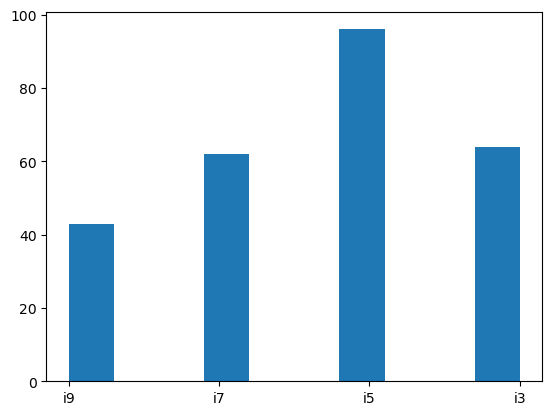

In [8]:
plt.hist(df.brand)

array([[<AxesSubplot: title={'center': 'nbr_cores'}>]], dtype=object)

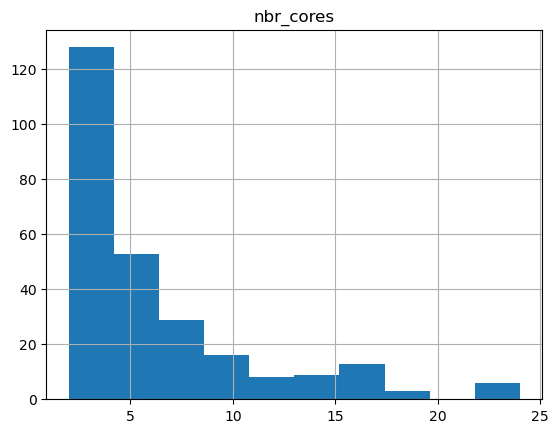

In [9]:
df.hist(column=["nbr_cores"])

C:\Users\aiman\AppData\Local\Temp\ipykernel_1888\2888727932.py:7: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(


Text(0.5, 1.0, 'Histogram of Brand by Number of Cores')

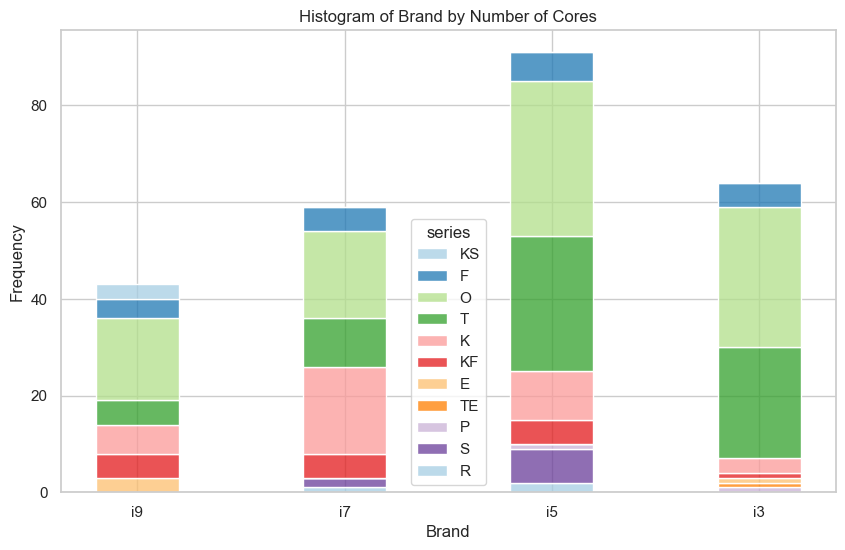

In [10]:
color= ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

sns.set(style="whitegrid") 

plt.figure(figsize=(10, 6)) 

sns.histplot(
    data=df,
    x="brand",
    hue = "series",
    shrink= .4,
    multiple="stack",
    palette=color,
    legend = True
    )

plt.xlabel("Brand")  
plt.ylabel("Frequency") 
plt.title("Histogram of Brand by Number of Cores")

C:\Users\aiman\AppData\Local\Temp\ipykernel_1888\107181336.py:7: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.histplot(


Text(0.5, 1.0, 'Histogram of Brand by Number of Cores')

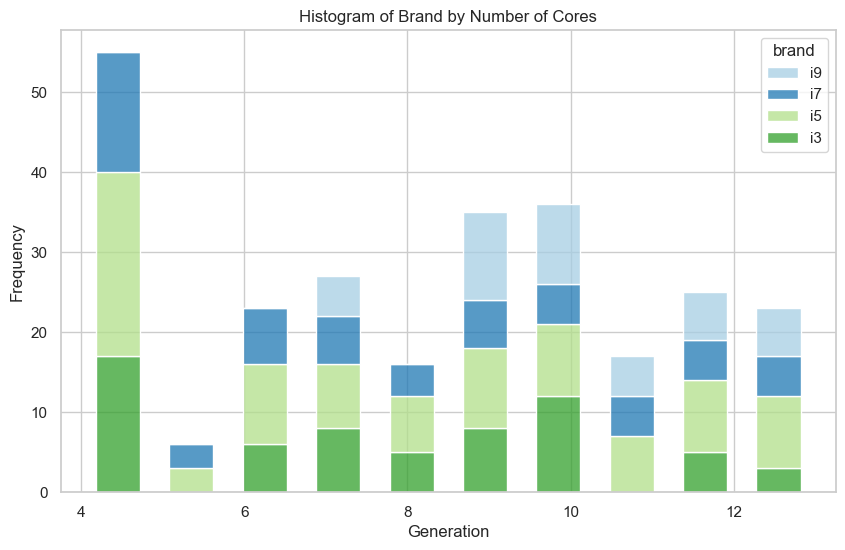

In [11]:
color= ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

sns.set(style="whitegrid") 

plt.figure(figsize=(10, 6)) 

sns.histplot(
    data=df,
    x="nGeneration2",
    hue = "brand",
    shrink= .6,
    multiple="stack",
    palette=color,
    legend = True
    )

plt.xlabel("Generation")  
plt.ylabel("Frequency") 
plt.title("Histogram of generation by brand ")

C:\Users\aiman\AppData\Local\Temp\ipykernel_4844\4027876588.py:7: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.histplot(


Text(0.5, 1.0, 'Histogram of Brand by Number of Cores')

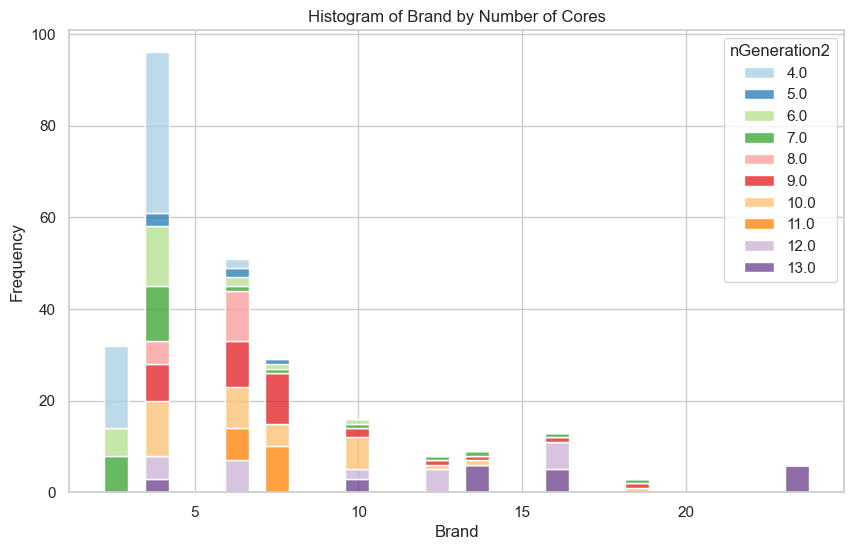

In [93]:
color= ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3e8a','#6a3d9a']

sns.set(style="whitegrid") 

plt.figure(figsize=(10, 6)) 

sns.histplot(
    data=df,
    x="nbr_cores",
    hue = "nGeneration2",
    shrink= .6,
    multiple="stack",
    palette=color,
    legend = True
    )

plt.xlabel("Brand")  
plt.ylabel("Frequency") 
plt.title("Histogram of Brand by Number of Cores")